In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
random_state=42

In [3]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [4]:
df.columns  = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')    
df.drop(columns=['patientid', 'doctorincharge'], inplace=True)
df.head()

,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,...,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [5]:
df["diagnosis"].value_counts()

diagnosis
0    1389
1     760
Name: count, dtype: int64

In [6]:
df.isna().sum()

age                          0
gender                       0
ethnicity                    0
educationlevel               0
bmi                          0
smoking                      0
alcoholconsumption           0
physicalactivity             0
dietquality                  0
sleepquality                 0
familyhistoryalzheimers      0
cardiovasculardisease        0
diabetes                     0
depression                   0
headinjury                   0
hypertension                 0
systolicbp                   0
diastolicbp                  0
cholesteroltotal             0
cholesterolldl               0
cholesterolhdl               0
cholesteroltriglycerides     0
mmse                         0
functionalassessment         0
memorycomplaints             0
behavioralproblems           0
adl                          0
confusion                    0
disorientation               0
personalitychanges           0
difficultycompletingtasks    0
forgetfulness                0
diagnosi

In [7]:
df["gender"].value_counts()

gender
1    1088
0    1061
Name: count, dtype: int64

In [8]:
df["gender"] == 1

0       False
1       False
2       False
3        True
4       False
        ...  
2144    False
2145    False
2146    False
2147     True
2148    False
Name: gender, Length: 2149, dtype: bool

In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(df.drop(columns=['diagnosis']), 
                                                    df['diagnosis'], 
                                                    test_size=0.3, 
                                                    random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=random_state)

X_train = pd.concat([x_train,x_val],axis=0) # para el entrenamiento real
Y_train = pd.concat([y_train,y_val],axis=0)

In [10]:
numeric_transformer = Pipeline(
        steps=[("scaler", StandardScaler())]
    )
    

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X_train.columns),
    ]
)

In [12]:
df.iloc[[0],:]

,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,...,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0


In [13]:
rf_base = RandomForestClassifier(random_state=random_state)

param_grid = {  
    'classifier__n_estimators': [x for x in range(1, 110, 10)],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [x for x in range(1, 20, 5)]
}

pipeline_rf = Pipeline(steps = [
    ('processor', preprocessor),
    ('classifier', rf_base),
                            ])

rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid)

In [14]:
rf.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'gender', 'ethnicity', 'educationlevel', 'bmi', 'smoking',
       'alcoholconsumption', 'physicalactivity', 'dietquality', 'sleepquality',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes',
       'depression...
       'memorycomplaints', 'behavioralproblems', 'adl', 'confusion',
       'disorientation', 'personalitychanges', 'difficultycompletingtasks',
       'forgetfulness'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 6, 11, 16],
                         'classifier__n_estimators': [1, 11, 21, 31, 41, 51, 61,
                                                      71, 81, 91, 101]})

In [15]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 81}

In [16]:
print(classification_report(y_train, rf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       988
           1       0.98      0.93      0.95       516

    accuracy                           0.97      1504
   macro avg       0.97      0.96      0.96      1504
weighted avg       0.97      0.97      0.97      1504



In [17]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       221
           1       0.94      0.75      0.84       102

    accuracy                           0.91       323
   macro avg       0.92      0.87      0.89       323
weighted avg       0.91      0.91      0.90       323



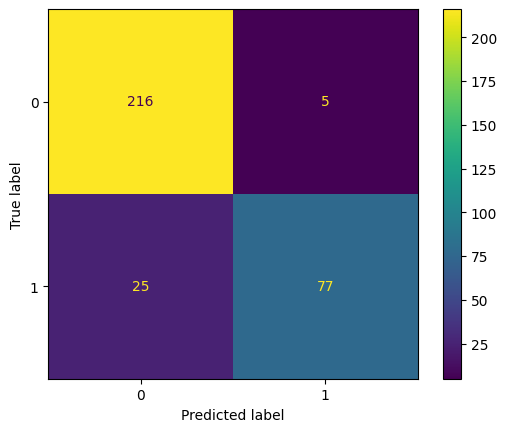

In [18]:
cm = confusion_matrix(y_test,rf.predict(x_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(model, X, y, dataset_name):
    y_pred = model.predict(X)
    return {
        "Dataset": dataset_name,
        "Accuracy": round(accuracy_score(y, y_pred), 3),
        "Precision": round(precision_score(y, y_pred, average="weighted"), 3),
        "Recall": round(recall_score(y, y_pred, average="weighted"), 3),
        "F1-Score": round(f1_score(y, y_pred, average="weighted"), 3)
    }

# Evaluar el modelo entrenado
resultados = []
for X, y, nombre in [(x_train, y_train, "Train"), (x_val, y_val, "Validation"), (x_test, y_test, "Test")]:
    resultados.append(calcular_metricas(rf, X, y, nombre))

df_rf = pd.DataFrame(resultados)
df_rf["Modelo"] = "rf"

# Exportar resultados
df_rf.to_csv("resultados_rf.csv", index=False)

In [21]:
dato = pd.read_csv("Dato_inventado.csv")

In [22]:
dato

,Unnamed: 0.1,Unnamed: 0,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,...,mmse,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness
0,0,0,83,1,3,1,17.299911,0,8.674505,6.354282,...,4.030491,5.173891,1,0,37.853987,0,0,0,0,1


In [23]:
rf.predict(dato).shape[0]

1

Para este dato, tomamos como referencia a un conocido con diagnóstico de Alzheimer. Y como esperamos, el modelo lo pudo predecir correctamente. 